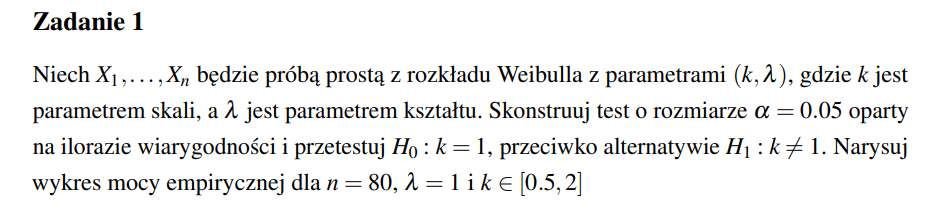



1. **Ogólna idea testu ilorazu wiarygodności**

Z wykładu mamy definicję ilorazu wiarygodności:
$
\lambda(\mathbf{X}) = \frac{\sup_{\theta \in \Theta_0} L(\mathbf{X}, \theta)}{\sup_{\theta \in \Theta} L(\mathbf{X}, \theta)}
$
oraz regułę testu:
$
\varphi(\mathbf{X}) =
\begin{cases}
1, & \text{gdy } \lambda(\mathbf{X}) < c_{\alpha}, \\
0, & \text{gdy } \lambda(\mathbf{X}) \geq c_{\alpha}.
\end{cases}
$
gdzie $ c_{\alpha} $ dobieramy tak, aby spełniony był warunek:
$
\sup_{\theta \in \Theta_0} P_{\theta} (\lambda(\mathbf{X}) > c_{\alpha}) = \alpha. $



W naszym przypadku:
* $ \Theta_0 $ to parametr przestrzeni hipotezy zerowej, czyli rozkład wykładniczy, który jest szczególnym przypadkiem Weibulla dla $k=1$
* $ \Theta $ to cała przestrzeń parametryczna Weibulla, tzn. $ k > 0 $.

2. **Funkcje wiarygodności**

Rozkład Weibulla dla zmiennej losowej $  X \sim \text{Weibull}(k, \lambda) $ ma funkcję gęstości:
$
f(x | k, \lambda) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k}, \quad x > 0.
$
Rozkład wykładniczy to szczególny przypadek Weibulla dla $ k = 1 $, czyli:
$
f(x | \lambda) = \frac{1}{\lambda} e^{-x/\lambda}.
$

Dla danej próbki  $ \mathbf{X} = (X_1, \dots, X_n) $ , funkcjami wiarygodności są:

**F. wiarygodności dla rozkładu wykładniczego** ($( H_0: k = 1 )$):

$
L(\mathbf{X} | k=1, \lambda) = \prod_{i=1}^{n} \frac{1}{\lambda} e^{-X_i/\lambda}.
$
Estymator największej wiarygodności dla $ \lambda $ w rozkładzie wykładniczym to:
$
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} X_i.
$
Podstawiając to do funkcji wiarygodności, otrzymujemy:
$
L_{\text{exp}}(\mathbf{X}) = \left( \frac{1}{\bar{X}} \right)^n e^{-n}.
$

**Funkcja wiarygodności dla rozkładu Weibulla:**

Estymatory największej wiarygodności (MLE) dla Weibulla to:
$
\hat{\lambda} = \left( \frac{1}{n} \sum_{i=1}^{n} X_i^k \right)^{1/k}.
$
Podstawiając to do funkcji wiarygodności, mamy:
$
L_{\text{Weibull}}(\mathbf{X}, k) = \left( \frac{k}{\hat{\lambda}} \right)^n \prod_{i=1}^{n} \left( \frac{X_i}{\hat{\lambda}} \right)^{k - 1} e^{-\sum (X_i / \hat{\lambda})^k}.
$

3. **Iloraz wiarygodności**

Test ilorazu wiarygodności porównuje maksymalne wartości funkcji wiarygodności w hipotezie zerowej i alternatywnej:
$
LR = -2 \ln \left( \frac{L_{\text{exp}}(\mathbf{X})}{\sup_{k} L_{\text{Weibull}}(\mathbf{X}, k)} \right).
$
Czyli:
$
LR = -2 \ln \left( \frac{\left( \frac{1}{\bar{X}} \right)^n e^{-n}}{\max_k L_{\text{Weibull}}(\mathbf{X}, k)} \right).
$

Z teorii wynika, że przy hipotezie zerowej statystyka testowa $ LR $ asymptotycznie ma rozkład chi-kwadrat z 1 stopniem swobody:
$
LR \sim \chi^2_1.
$
Stąd obliczamy wartość p:
$
p = P(\chi^2_1 > LR).
$


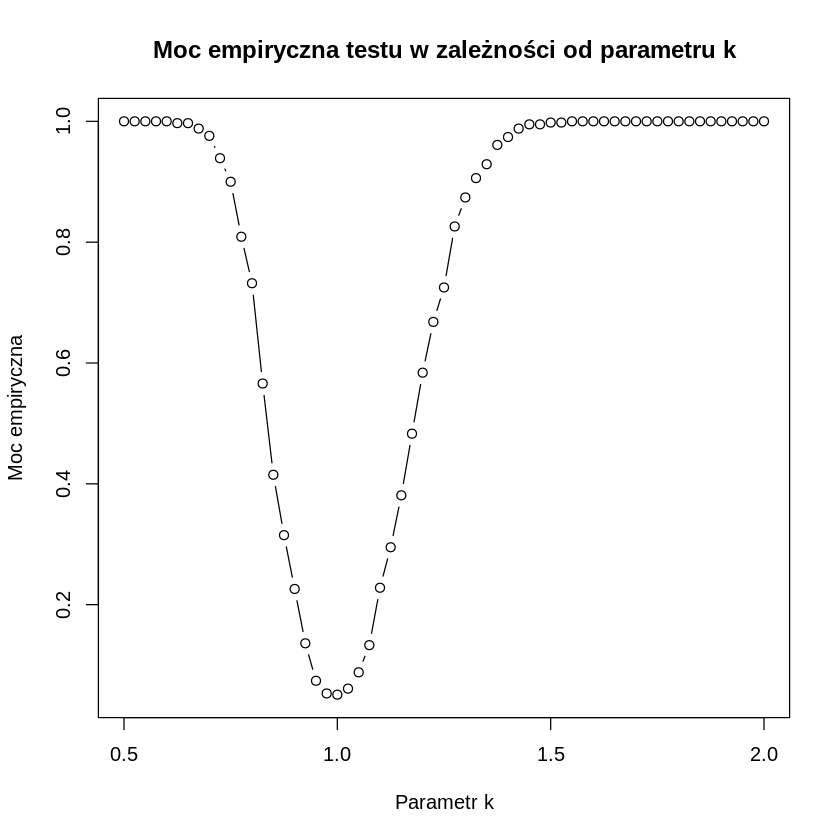

In [ ]:
k_values <- seq(0.5, 2, by = 0.025)
n <- 80
alpha <- 0.05

# Generowania próby z rozkładu Weibulla
generate_weibull_sample <- function(k) {
  rweibull(n, shape = k, scale = 1) #przy hipotezie H0: k=1
}

# Funkcja wiarygodności (dla wykładniczego, Weilllbul jest wykładnicze dla k=1)
likelihood_exp <- function(data) {
  lambda <- 1/mean(data)
  lambda^n * exp(-lambda * sum(data))
}

# Funkcja wiarygodności (dla Weibulla)
likelihood_weibull <- function(data, k) {
  lambda_hat <- (sum(data^k) / length(data))^(1/k)
  (k / lambda_hat)^n * prod((data / lambda_hat)^(k - 1)) * exp(-sum((data / lambda_hat)^k))
}


# Test ilorazu wiarygodności, test asymptotycznie zgodny
lr_test <- function(data) {
  l_exp <- likelihood_exp(data) #wartosc funkcji wiarygodnosci dla danych przy H0
  l_weibull_max <- max(sapply(k_values, function(k) likelihood_weibull(data, k))) #sup f. wiarygodnosci dla danych przy H1
  lr <- -2 * log(l_exp / l_weibull_max) #dla danych przy H0
  p_value <- pchisq(lr, df = 1, lower.tail = FALSE)
  list(lr = lr, p_value = p_value)
}

empirical_power <- numeric(length(k_values))
num_simulations <- 1000

# Symulacja
for (i in 1:length(k_values)) {
  k <- k_values[i]
  rejections <- 0

  for (j in 1:num_simulations) {
    sample <- generate_weibull_sample(k) #generujemy probe z rozkladu Weibulla
    test_result <- lr_test(sample) #nasza statystyka testowa
    if (test_result$p_value < alpha) {
      rejections <- rejections + 1
    }
  }

  empirical_power[i] <- rejections / num_simulations
}

plot(k_values, empirical_power, type = 'b', xlab = 'Parametr k', ylab = 'Moc empiryczna',
     main = 'Moc empiryczna testu w zależności od parametru k')

plot(k_values, empirical_power, type = 'b', xlab = 'Parametr k', ylab = 'Moc empiryczna',
     main = 'Moc empiryczna testu w zależności od parametru k', xlim = c(0.5, 2))



Wykres pokazuje moc empiryczną testu w zależności od parametru
k.
Krzywa ma wyraźne minimum w okolicach $k=1$, co oznacza, że test ma najmniejszą moc właśnie wtedy, gdy dane pochodzą z rozkładu wykładniczego (który odpowiada
$k=1$ w rozkładzie Weibulla).

Przy
𝑘
→
0.5
 lub
𝑘
→
2
 moc zbliża się do 1, co sugeruje, że test niemal zawsze poprawnie identyfikuje różnice między rozkładem Weibulla a wykładniczym.

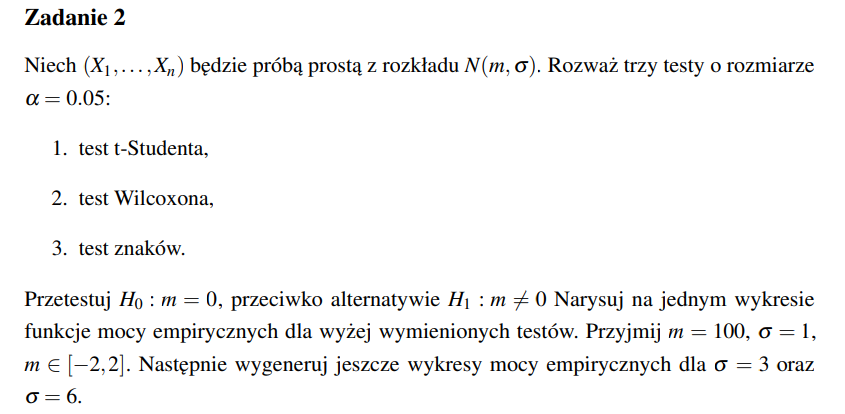

**Test t-studenta - wariant 2**


Wariant ten jest używany w kontekście testowania hipotezy dotyczącej średniej populacji 𝑚, szczególnie gdy chcemy przetestować, czy średnia jest równa pewnej wartości $𝑚_0$. Czyli $𝐻_0:𝑚=𝑚_0$ przy alternatywie $𝐻_1:𝑚≠𝑚_0$. Tutaj również przyjmujemy założenie, że dane pochodzą z rozkładu normalnego o nieznanych parametrach.


Statystyka testowa:
$$T(X) = \frac{\sqrt{n} \sum_{j=1}^n (X_j - m_0)}{\sqrt{\frac{1}{n-1} \sum_{j=1}^n (X_j - \bar{X})^2}}$$

p wartość:
$$
p(X) = 2 \left( 1 - F_{t_{n-1}} \left( \frac{\sqrt{n} \left| \sum_{j=1}^n (X_j - m_0)\right| }{\sqrt{\frac{1}{n-1} \sum_{j=1}^n (X_j - \bar{X})^2}} \right) \right) = 2 \left( 1 - F_{t_{n-1}} |T| \right) $$


**Test Wilcoxona**


Jest to nieparametryczna wersja testu t-Studenta dla wariantu 1 i 2.

Przypomnijmy, że dla testu t-Studenta mieliśmy $ 𝑋_1,…,𝑋_𝑛∼𝑁(𝑚,𝜎2)$. W wariancie 1 testowaliśmy $𝐻_0:𝑚≤𝑚_0 $, przeciwko $𝐻_1:𝑚>𝑚_0 $. Dla wariantu 2 natomiast $𝐻_0:𝑚=𝑚_0$, przeciwko $𝐻_1:𝑚≠𝑚_0 $.

Teraz mamy $ 𝑋_1,…,𝑋_𝑛 $ próbę prostą o dystrybuancie$ 𝐹_𝑋(𝑡)=𝐹(𝑡)-Δ(𝑡) $, gdzie:

𝐹 jest nieznaną, ciągłą dystrybuantą, symetryczną wokół 0,
$Δ$ jest funkcją stałego znaku.

Będą nas interesować dwa warianty:

$ 𝐻_0:Δ≤0, \text{przeciwko }  𝐻_1:Δ>0, $

$ 𝐻_0:Δ≤0,  \text{przeciwko } 𝐻_1:Δ>0,$

Niech $(|𝑅_1|,…,|𝑅_𝑛|) $będzie wektorem rang dla $(|𝑋_1|,…,|𝑋_𝑛|)$.

Oznaczmy również:
$𝑅¯|𝑋_+|= \frac{1}{n} ∑_{n}^𝑖=|𝑅_𝑖|𝕀(𝑋_𝑖>0) $ oraz $𝑅¯|𝑋_−|=\frac{1}{n}∑|_{n}^𝑖=|𝑅_𝑖|𝕀(𝑋_𝑖<0)$

$
\text{Test Wilcoxona odrzuci:}$

$	•
H_0 : \Delta \leq 0, \quad \text{gdy } \overline{R}\lvert X^+ \rvert - \overline{R}\lvert X^- \rvert \text{ będzie duże,} $

$	•
H_0 : \Delta = 0, \quad \text{gdy } \left| \overline{R}\lvert X^+ \rvert - \overline{R}\lvert X^- \rvert \right| \text{ będzie duże.} $

$ \text{Zestandaryzowana statystyka testowa Wilcoxona przy prawdziwości hipotezy zerowej:}$

$$
W = \frac{\overline{R}|X^+| - \overline{R}|X^-|}{\sqrt{V_{\Delta = 0}\left(\overline{R}|X^+| - \overline{R}|X^-|\right)}} = \frac{\overline{R}|X^+| - \frac{n+1}{4}}{\sqrt{\frac{(n+1)(2n+1)}{24n}}} \xrightarrow{n \to \infty} \mathcal{N}(0, 1).$$

$\text{P-wartość:} $

$$
p(W) = 2 \left( 1 - F_{\mathcal{N}(0,1)}(|W|) \right)
$$

**TEST ZNAKÓW**

1. $H_0 : x_p \leq m$, przeciwko $H_1 : x_p > m$,  
2. $H_0 : x_p = m$, przeciwko $H_1 : x_p \neq m$.

Wartość $m$ jest znana i ustalona. Wobec tego, możemy rozważyć przesunięte dane:

$ \mathbf{Z} = (Z_1, Z_2, \ldots, Z_n) = (X_1 - m, X_2 - m, \ldots, X_n - m). $

Wtedy $z_p$ będzie oznaczać kwantyl rzędu $p$ dla próby $\mathbf{Z}$. Wówczas problem testowania sprowadza się do:

1. $H_0 : z_p \leq 0$, przeciwko $H_1 : z_p > 0$,  
2. $H_0 : z_p = 0$, przeciwko $H_1 : z_p \neq 0$.

Na wykładzie pokazano, że odzworowania:

$ \text{Rang}_+ (|Z_1|, \ldots, |Z_n|) = (r_1 \mathbb{I}(Z_1 > 0), \ldots, r_n \mathbb{I}(Z_n > 0)), $  
$ \text{Rang}_- (|Z_1|, \ldots, |Z_n|) = (r_1 \mathbb{I}(Z_1 < 0), \ldots, r_n \mathbb{I}(Z_n < 0)) $  

są maksymalnym niezmiennikiem względem grupy przekształceń:

$ G = \{g : \mathbb{R}^n \to \mathbb{R}^n : g(x) = (h(X_1), \ldots, h(X_n)), \, h - \text{ciągła, ściśle rosnąca i nieparzysta} \}. $

Oznaczmy odpowiednio frakcję dodatnich i ujemnych obserwacji:

$ P_+ = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(Z_i > 0) $ oraz $ P_- = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(Z_i < 0). $

Test znaków odrzuci:
1. $H_0 : z_p \leq 0$, gdy $P_+ - P_-$ jest duże,  
2. $H_0 : z_p = 0$, gdy $|P_+ - P_-|$ jest duże.

Statystyka testowa to zstandaryzowana różnica $P_+ - P_-$, przy prawdziwości hipotezy zerowej ma następujący rozkład:

$ S = \sqrt{n} \frac{P_+ - P_- - (1 - p)}{\sqrt{p(1 - p)}} \overset{d}{\to} N(0, 1). $

Zatem:
1. Dla testu $H_0 : z_p \leq 0$, przeciwko $H_1 : z_p > 0$, mamy $\phi(S) = 1$ dla $S > c_\alpha$, gdzie $c_\alpha = F_{N(0, 1)}^{-1}(1 - \alpha)$. Asymptotyczna p-wartość wynosi $p(S) = 1 - F_{N(0, 1)}(S).$
2. Dla testu $H_0 : z_p = 0$, przeciwko $H_1 : z_p \neq 0$, mamy $\phi(S) = 1$ dla $|S| > c_\alpha$, gdzie $c_\alpha = F_{N(0, 1)}^{-1}(1 - \alpha/2)$. Asymptotyczna p-wartość wynosi $p(S) = 2 \cdot (1 - F_{N(0, 1)}(|S|)).$

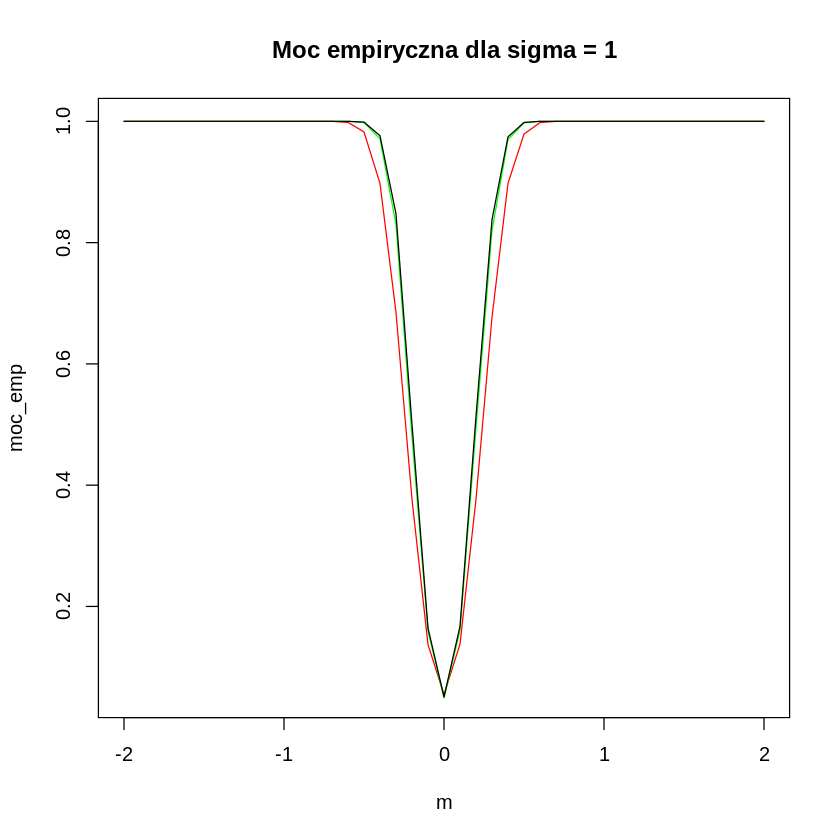

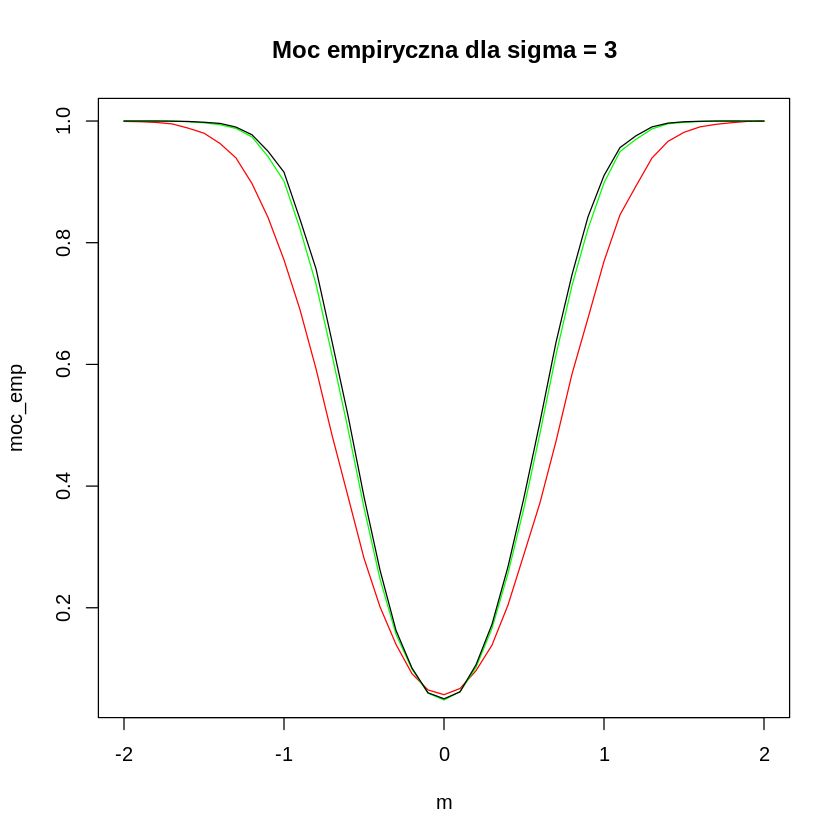

[1] 0.04961324


	Wilcoxon signed rank test with continuity correction

data:  Z
V = 3096, p-value = 0.04981
alternative hypothesis: true location is not equal to 0


[1] 0.07186064


	Exact binomial test

data:  sum(Z > 0) and n
number of successes = 59, number of trials = 100, p-value = 0.08863
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4871442 0.6873800
sample estimates:
probability of success 
                  0.59 


[1] 0.07525554


	One Sample t-test

data:  Z
t = 1.7978, df = 99, p-value = 0.07526
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1145195  2.3234835
sample estimates:
mean of x 
 1.104482 


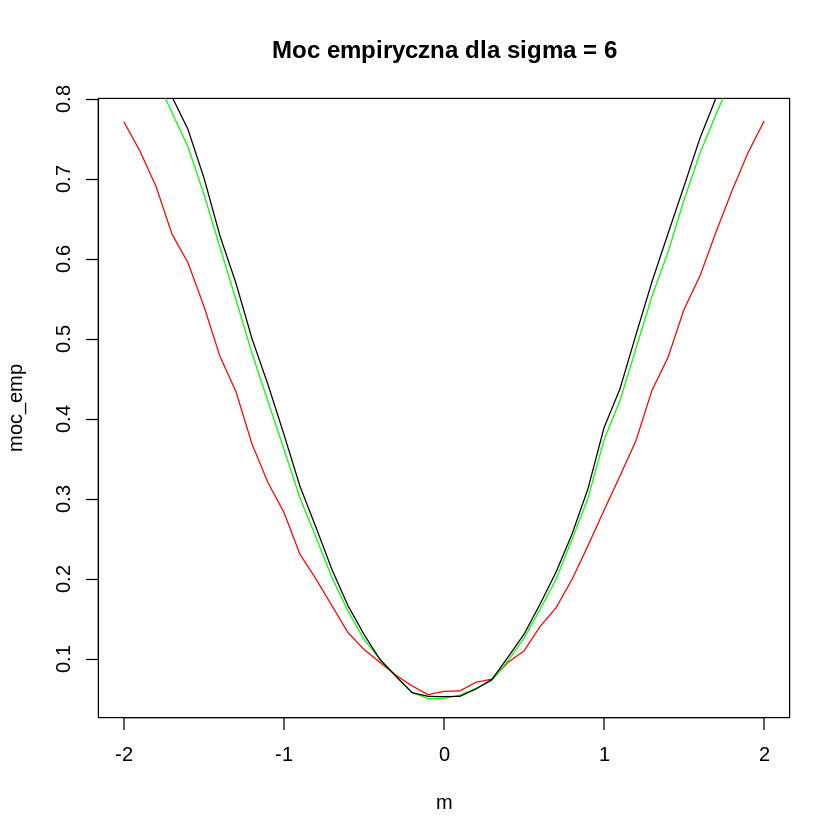

In [ ]:
set.seed(123)
m = seq(-2,2, by=0.1) # z przedziału [-2,2]
mc =10000
n=100
rz = 0.5 #kwantyl
K = 0
alpha = 0.05
s = c(1, 3, 6)
for (sigma in s) {
  moc_emp =numeric(length(m))    # Moc testu znaków
  moc_emp_w = numeric(length(m)) # Moc testu Wilcoxona
  moc_emp_tstud2=numeric(length(m)) # Moc testu t-studenta (wariant 2)

  for (i in 1 : length(m)){
    licznik = 0
    licznik_w=0
    licznik_tstud2 =0
    for (j in 1 : mc){
      Z = rnorm(n,m[i],sigma)
      Z = (Z-K)
      M = sum(Z > 0) / n
      R = rank(abs(Z),ties.method = "random")
      Mw = sum(R[Z > 0])
      S = sqrt(n)*(M-(1-rz))/sqrt(rz*(1-rz))
      Mw=Mw/n
      W = (Mw-(n+1)/4)/sqrt((n+1)*(2*n+1)/(24*n))
      Ts = sqrt(1/n)*(sum(Z))/sqrt(sum((Z-mean(Z))^2)/(n-1))
      p_w_t = 2*(1-pt(abs(Ts),n-1))
      p = 2 * (1-pnorm(abs(S),0,1))
      pw = 2*(1-pnorm(abs(W),0,1))
      if (p < alpha){
        licznik = licznik + 1
      }
      if (pw < alpha){
        licznik_w = licznik_w + 1
      }
      if(p_w_t< alpha){
        licznik_tstud2 = licznik_tstud2+1
      }
    }
    moc_emp[i] = licznik / mc
    moc_emp_w[i] = licznik_w / mc
    moc_emp_tstud2[i]=licznik_tstud2/mc

    moc_emp
    moc_emp_w
    moc_emp_tstud2
  }
  plot(m,moc_emp, type='l', col='red',main = paste("Moc empiryczna dla sigma =", sigma))
  lines(m,moc_emp_w, type='l', col='green')
  lines(m,moc_emp_tstud2, type='l', col='black')
}

pw
wilcox.test(Z, alternative = "two.sided")
p
binom.test(sum(Z > 0), n, p=0.5, alternative = "two.sided" )
p_w_t
t.test(Z,mu= 0, alternative = "two.side")

1. **Analiza wykresów mocy empirycznej**

Na wykresach przedstawiona jest moc empiryczna trzech testów

(kolory linii):
*   Czerwona - test znaków (binominalny)
*   Zielona - test Wilcoxona
*   Czarna - test t-Studenta


Moc empiryczna opisuje prawdopodobieństwo odrzucenia hipotezy zerowej w zależności od wartości parametru  m .

Interpretacja wykresów dla różnych wartości sigma:

  1.	Sigma = 6 (pierwszy wykres)

*   Moc testu dla różnych wartości  m  jest relatywnie niska.
*   Najmniejsza moc jest dla $ m \approx 0 $ (gdzie testy mają trudność z wykryciem różnicy).
*   Dla większych wartości  |m| , moc rośnie, ale nie osiąga 100%.
*   Różnice między testami są wyraźne – test t-Studenta (czarna linia) wydaje się najskuteczniejszy.

2.	Sigma = 3 (drugi wykres)

*   Ogólnie większa moc testu niż dla  $\sigma = 6$ .
*   Testy osiągają blisko 100% mocy dla większych wartości  $|m|$ .
*   Test Wilcoxona (zielona linia) oraz test t-Studenta (czarna linia) są bardzo podobne.

3.	Sigma = 1 (trzeci wykres)

*   Moc testu jest niemal natychmiastowa dla wartości $ |m| > 0.5$.
*  Testy osiągają prawie 100% mocy bardzo szybko.
*   Wszystkie trzy testy zachowują się podobnie.


Wniosek:
Im mniejsza wariancja  $\sigma $, tym łatwiej testy wykrywają różnicę między hipotezą zerową a alternatywną. Gdy $ \sigma = 6 $, testy mają trudności w wykryciu różnic (są mniej czułe). Natomiast dla $ \sigma = 1 $, testy działają niemal perfekcyjnie.

**P wartości:**

 Test Wilcoxona : 0.049613243261301 $<$ 0.05 ale granicznie (odrzucamy hipoteze zerowową: m=0)

Test znaków: 0.0718606382258518 $>$ 0.05 nie mamy podstaw do odrzucenia hipotezy zerowej.

Test t-studenta: 0.075255536795682 $>$ 0.05 nie mamy podstaw do odrzucenia hipotezy zerowej.

Wyniki wszystkich testów,stworzonych przez nas, pokrywają się z wynikami testów wprowadzonych w pakietach R.